Applying Image Negative...


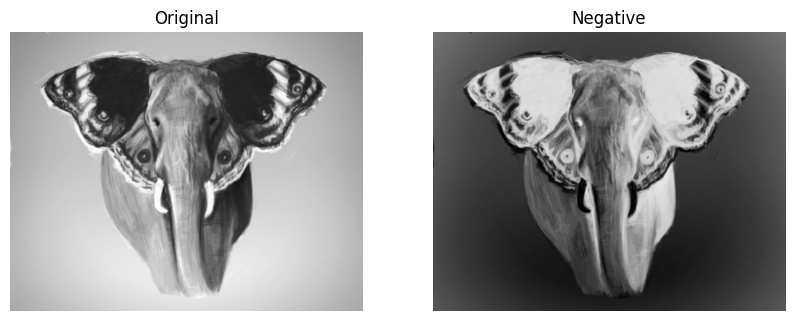

Applying Log Transformation...


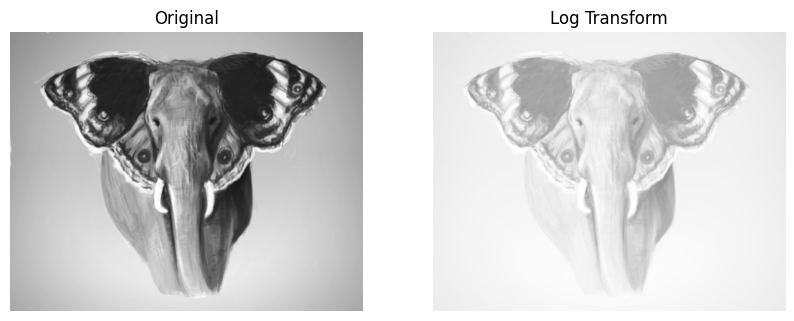

Applying Gamma Correction...


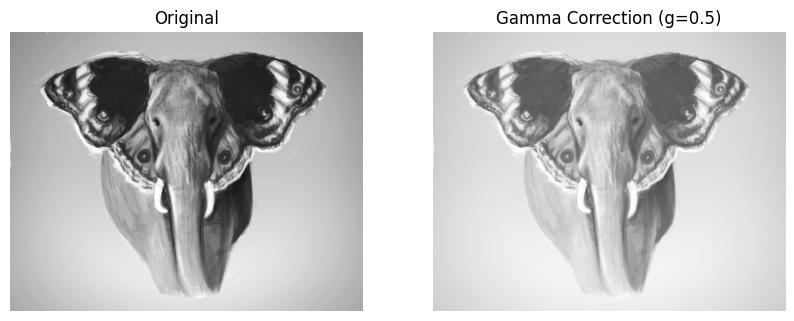

Applying Contrast Stretching...


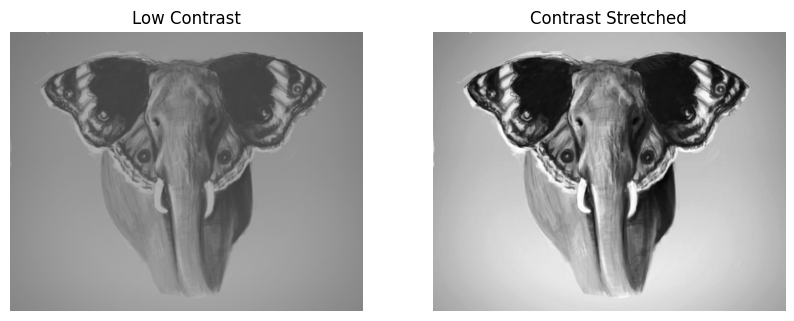

Applying Intensity Slicing...


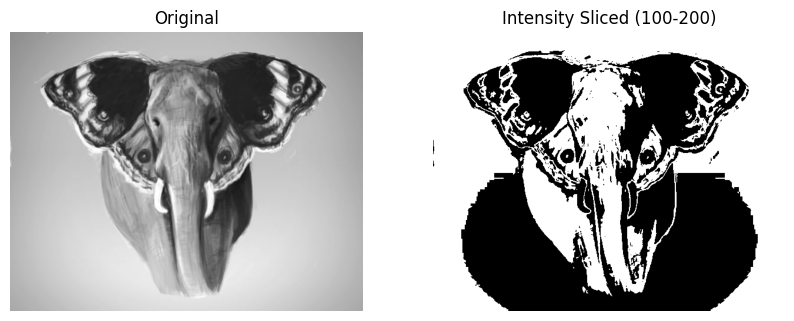

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

img = cv2.imread('img1.jpg')

if img is None:
    print("Error: Could not open or find the image 'img1.jpg'.")
    print("Please make sure the image file is in the same directory as the script.")
    sys.exit()

print("Applying Image Negative...")
# This inverts every pixel color.
negative_img = cv2.bitwise_not(img)

# --- Plotting ---
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB)), plt.title('Negative'), plt.axis('off')
plt.show()

print("Applying Log Transformation...")


img_float = img.astype(np.float32)
c = 255 / np.log(1 + np.max(img_float))
log_transformed_img = c * (np.log(img_float + 1))

log_transformed_img = np.array(log_transformed_img, dtype=np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(log_transformed_img, cv2.COLOR_BGR2RGB)), plt.title('Log Transform'), plt.axis('off')
plt.show()

print("Applying Gamma Correction...")
gamma = 0.5
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
gamma_img = cv2.LUT(img, lookUpTable) # Apply the lookup table

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB)), plt.title(f'Gamma Correction (g={gamma})'), plt.axis('off')
plt.show()

print("Applying Contrast Stretching...")
low_contrast_img = (img * 0.5 + 50).astype(np.uint8)

min_val = np.min(low_contrast_img)
max_val = np.max(low_contrast_img)

if max_val - min_val != 0:
    stretched_img = 255.0 * (low_contrast_img - min_val) / (max_val - min_val)
    stretched_img = np.array(stretched_img, dtype=np.uint8)
else:
    stretched_img = low_contrast_img # If the image is a solid color, no stretching is needed.


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(low_contrast_img, cv2.COLOR_BGR2RGB)), plt.title('Low Contrast'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(stretched_img, cv2.COLOR_BGR2RGB)), plt.title('Contrast Stretched'), plt.axis('off')
plt.show()

print("Applying Intensity Slicing...")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
low, high = 100, 200 

sliced_img = np.zeros_like(gray_image)
sliced_img[np.where((gray_image >= low) & (gray_image <= high))] = 255

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(sliced_img, cmap='gray'), plt.title(f'Intensity Sliced ({low}-{high})'), plt.axis('off')
plt.show()